In [1]:
"""
Author: JiaHui (Jeffrey) Lu
ID: 25944800
"""
import numpy as np
import matplotlib.pyplot as plt

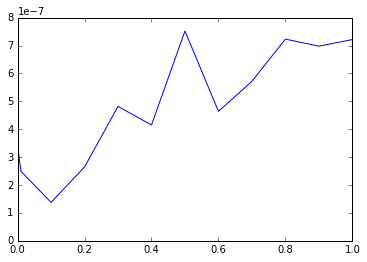

In [23]:
def my_log1p(x):
    n = 2
    ans = x
    while True:
        delta = (((-1)**(n+1))*(x**n))/n
        ans += delta
        if n >= 1000000 or abs(delta) < 0.000001:
            break
        n += 1
        # print(delta)
    actual = np.log1p(x)
    error = abs((ans - actual)/actual)
    return ans, n, error

test_val = [2.220446049250313e-50, 2.220446049250313e-16, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
result_errors = []
for test_item in test_val:
    _, __, result_error = my_log1p(test_item)
    result_errors.append(result_error)
plt.plot(test_val, result_errors)
plt.show()

In [22]:
"""
Looks like the script is only good for x between 0 and 1

"""
my_log1p(1)

(0.6931466805602525, 1000000, 7.2134707719108213e-07)